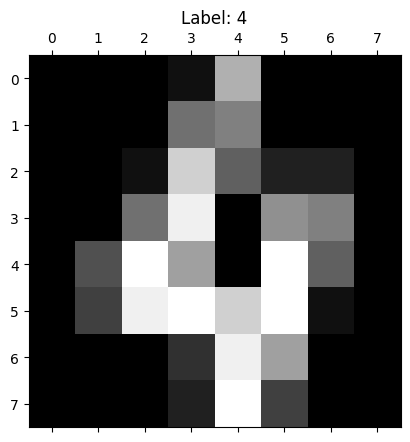

Formato das imagens: (1797, 8, 8)
Formato dos dados (flattened): (1797, 64)
Rótulos únicos: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)}
Acurácia: 0.9694444444444444
Matriz de Confusão:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  1 32  0  0  0  0  0  0  0]
 [ 0  0  1 33  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  1  0  0  0  0  0 28  0]
 [ 0  0  0  1  1  1  0  0  1 36]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       0.94      0.97      0.96        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.9

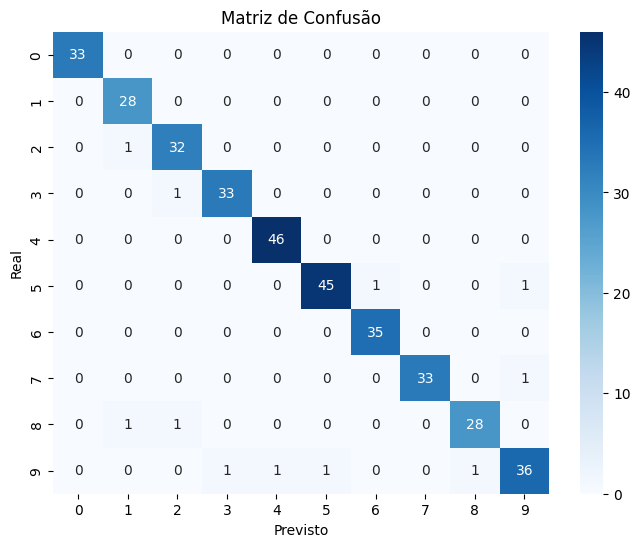

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Carregar o dataset
digits = load_digits()

# Visualizar uma imagem de exemplo
plt.matshow(digits.images[4], cmap='gray')
plt.title(f"Label: {digits.target[4]}")
plt.show()

# Mostrar o shape dos dados
print("Formato das imagens:", digits.images.shape)
print("Formato dos dados (flattened):", digits.data.shape)
print("Rótulos únicos:", set(digits.target))

# Padronizar os dados (boa prática para muitos algoritmos)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(digits.data)

# Features e labels
X = X_scaled
y = digits.target

# Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar o modelo KNN (com k=3 como exemplo)
knn = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Acurácia
print("Acurácia:", accuracy_score(y_test, y_pred))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", cm)

# Relatório completo: Precisão, Recall, F1-score
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# Plotando a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()